<a href="https://colab.research.google.com/github/Structsagar/Earthquake-Dynamics/blob/main/Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sympy as sm
import pandas as pd
from matplotlib import patches
from matplotlib import animation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 100 * 1024 * 1024

In [25]:
#initializing the constants
m,c,k = sm.symbols('m,c,k')
#initializing variables
t,F = sm.symbols('t,F')
#initializing functions
x = sm.Function('x')(t)


# creating derivatives
ddx_ddt=sm.diff(x,t,2)
dx_dt=sm.diff(x,t,1)

#my_eqn= ddx_ddt+c/m*dx_dt +k/m*x-F/m
lhs=ddx_ddt+c/m*dx_dt +k/m*x
rhs=F/m
my_eqn=sm.Eq(lhs,rhs)

#inital condition
int_condn={
    x.subs(t,0):0,
    dx_dt.subs(t,0):0
}

solution = sm.dsolve(my_eqn,x, ics = int_condn)
solution

Eq(x(t), F/k + (-F*c/(2*k*sqrt(c**2 - 4*k*m)) - F/(2*k))*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)) + (F*c/(2*k*sqrt(c**2 - 4*k*m)) - F/(2*k))*exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m)))

In [26]:
simplified_sol = solution.subs([(m,10000),(c,0),(k,1200)])
simplified_sol

Eq(x(t), -F*exp(sqrt(3)*I*t/5)/2400 + F/1200 - F*exp(-sqrt(3)*I*t/5)/2400)

In [27]:
solution_func = sm.lambdify((t,F),simplified_sol.rhs,modules=['numpy'])


In [28]:
import_file=pd.read_excel("/content/drive/MyDrive/Data/EL CENTRO.xlsx")
df=pd.DataFrame(import_file)
display(df)
row_of_data = df.shape[0]
t_data=[i for i in range(row_of_data )]
F_data=[j for j in range(row_of_data )]
F_data
for index,row in df.iterrows():
  t_data[index]=row['t']
  F_data[index]=row['A']*9.81  # Converting the real time data G in terms of m/s2
t_data=np.array(t_data)
F_data=np.array(F_data)


,t,A
0,0.01,0.000998
1,0.02,0.000999
2,0.03,0.001000
3,0.04,0.001000
4,0.05,0.001001
...,...,...
5367,53.68,-0.000178
5368,53.69,-0.000179
5369,53.70,-0.000179
5370,53.71,-0.000179


In [29]:

response=solution_func(t_data,F_data)*1000
response
#response

array([ 4.89756501e-08+0.j,  1.96030994e-07+0.j,  4.41325336e-07+0.j, ...,
       -4.44506889e-05+0.j, -4.32616577e-05+0.j, -4.20855331e-05+0.j])

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


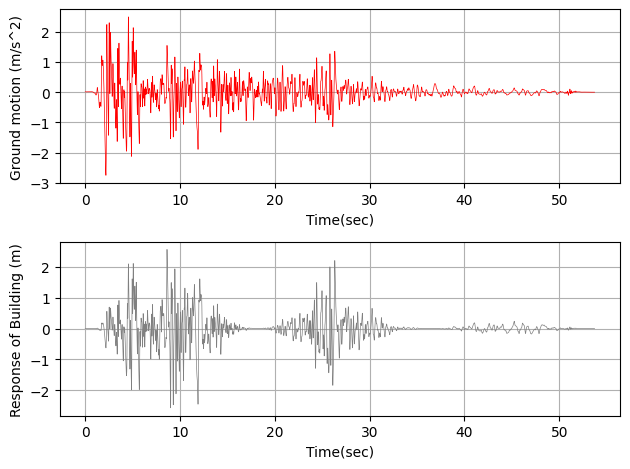

In [30]:
fig,ax = plt.subplots(2)
ax[1].plot(t_data,response, color='grey',lw=0.5,label="x(t)")
ax[0].plot(t_data,F_data, color='red',lw=0.5,label="x(t)")
ax[0].grid(True)
ax[1].grid(True)
ax[1].set_xlabel("Time(sec)")
ax[1].set_ylabel("Response of Building (m)")
ax[0].set_xlabel("Time(sec)")
ax[0].set_ylabel("Ground motion (m/s^2)")
plt.tight_layout()
plt.show()



In [31]:
#fig=plt.figure(constrained_layout=True)
#spec=gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
#ax1=fig.add_subplot(spec[0,0])
#ax1.plot(t_data,F_data, color='red',lw=0.5)
#ax1.set_xlabel("Time (sec)")
#ax1.set_ylabel("Ground motion (m/$s^2$)")

#ax2=fig.add_subplot(spec[1,0])
#ax2.plot(t_data,response, color='grey',lw=0.5)
#ax2.set_xlabel("Time (sec)")
#ax2.set_ylabel("Response of Building (mm)")

#ax3=fig.add_subplot(spec[:,1])
#ax3.plot(t_data,response)

#ax3.text(53, 2.5, 'Mass=10000 kg', fontsize=8, color='black', ha='right')
#ax3.text(53, 2.25, 'K=1200 KN/m', fontsize=8, color='black', ha='right')

#plt.show()


In [32]:
fig=plt.figure(constrained_layout=True)
spec=gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
ax1=fig.add_subplot(spec[0,0])
axone,=ax1.plot([],[],color='blue',lw=0.5)
ax1dot,=ax1.plot([],[],'o',markersize=3.5,color='red')
ax1.set_xlabel("Time (sec)")
ax1.set_ylabel("Ground motion (m/$s^2$)")
ax1.set_xlim(0,60)
ax1.set_ylim(-3,3)

ax2=fig.add_subplot(spec[1,0])
axtwo,=ax2.plot([],[],color='grey',lw=0.5)
ax2dot,=ax2.plot([],[],'o',markersize=3.5,color='red')
ax2.set_xlabel("Time (sec)")
ax2.set_ylabel("SDOF System Response (mm)")
ax2.set_xlim(0,60)
ax2.set_ylim(-3,3)

ax3=fig.add_subplot(spec[:,1])
axthree,=ax3.plot([],[],color="black",lw=1 )
circ=patches.Circle((0,5),0.3,color='black')
circle1=ax3.add_patch(circ)
rec = patches.Rectangle((-0.5,-0.2),1,0.2, color="brown")
ax3.add_patch(rec)
ax3.set_xlim(-3,3)
ax3.set_ylim(-1,6)
ax3.set_xticks([])
ax3.set_yticks([])

#ax3.text(53, 2.5, 'Mass=10000 kg', fontsize=8, color='black', ha='right')
#ax3.text(53, 2.25, 'K=1200 KN/m', fontsize=8, color='black', ha='right')

def animate(i):
    axone.set_data(t_data[:i],F_data[:i] )
    ax1dot.set_data([t_data[i]], [F_data[i]])  # Update marker position for ax1dot
    axtwo.set_data(t_data[:i], response[:i])
    ax2dot.set_data([t_data[i]],[response[i]])  # Update marker position for ax0dot
    axthree.set_data((0,response[i]/10),(0,5))
    circle1.center=(response[i]/10, 5)
    return axone, ax1dot, axtwo, ax2dot, axthree, circle1

fig.suptitle("Dynamic Analysis of SDOF system",fontsize=14)

anim= animation.FuncAnimation(fig=fig,func=animate,frames=len(t_data),interval=25,blit=True)
##HTML(animation.to_jshtml())
duration=30 #30 sec animation
writervideo = animation.FFMpegWriter(fps=len(t_data)/duration)
anim.save('Dynamic_SDOF.mp4', writer=writervideo)
plt.close(fig)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:2041: ComplexWarning: Casting complex values to real discards the imaginary part
  self._mtx[0, 2] += tx
